# Salient Region Detector example

This notebook shows how to use the main functionality of the `salientregions` package, namely the SalientDetector.

In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we load the image and show it.

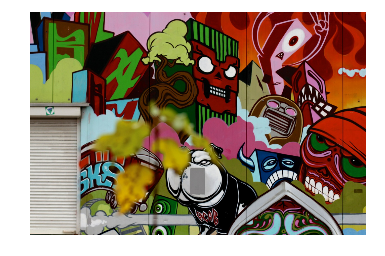

In [3]:
#Load the image
path_to_image = 'images/graffiti.jpg'
img = cv2.imread(path_to_image)
sr.show_image(img)

Now we create a SalientDetector object, with some parameters.

In [4]:
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

We ask the SalientDetector to detect all types of regions:

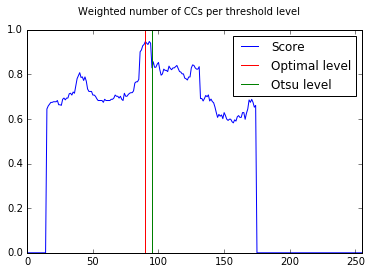

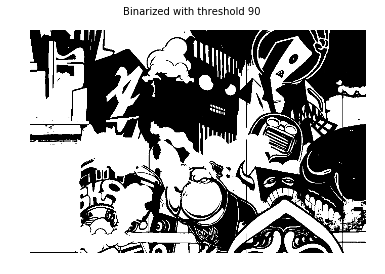

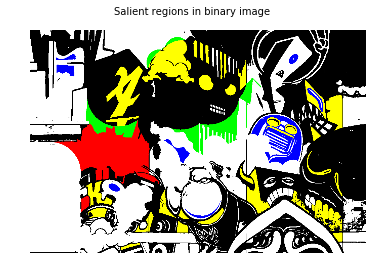

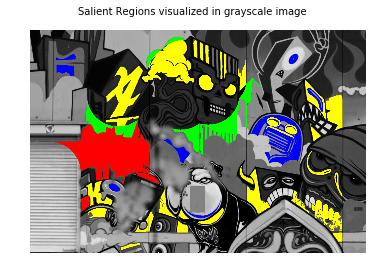

['indentations', 'islands', 'holes', 'protrusions']


In [5]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=True)
print regions.keys()

We can also output the regions as ellipses

In [6]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions)

Saliency type:  indentations
Number of regions for that saliency type:  6
Saliency type:  islands
Number of regions for that saliency type:  31
Saliency type:  holes
Number of regions for that saliency type:  7
Saliency type:  protrusions
Number of regions for that saliency type:  1


We can also save the elliptic parameters in text files. Below is an example of saving the polynomial coefficients of all regions represented as ellipses.

In [9]:
total_num_regions = sr.save_ellipse_features2file(num_regions, features_poly, 'poly_features.txt')
print "total_num_regions", total_num_regions

 saliency type:  indentations
n: features 0 : [ -5.63442383e+01   1.42432800e+02   3.49375491e-06  -1.73489827e-20
   1.45158949e-04   3.00000000e+00]
n: features 1 : [  2.87672150e+02   2.97339478e+02   2.18750326e-03   3.31346831e-04
   8.96396969e-04   3.00000000e+00]
n: features 2 : [  5.72663879e+02   2.97517578e+02   3.92388065e-04   2.13116277e-04
   3.06623208e-04   3.00000000e+00]
n: features 3 : [  2.00506821e+02   2.71781708e+02   7.75694600e-04  -5.34387246e-04
   1.07341783e-03   3.00000000e+00]
n: features 4 : [  6.52049988e+02   1.99939926e+02   3.63964714e-04   4.90245073e-04
   1.92491775e-03   3.00000000e+00]
n: features 5 : [  3.56702637e+02   8.91811371e+01   5.11869872e-03   5.76713017e-03
   7.74350922e-03   3.00000000e+00]
saliency type:  islands
n: features 0 : [  2.97262970e+02   6.45468323e+02   5.78814379e-02   1.62275605e-02
   5.48361400e-03   2.00000000e+00]
n: features 1 : [  9.20943054e+02   6.17644897e+02   5.15764719e-03  -2.17914587e-03
   4.28679726e